
# Project: Investigate a Dataset - [FBI Gun Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

My dataset of choice is a **FBI database of number of calls to check wherether a person is eligible to purchase firearms or explosives**.
This dataset, in a **CSV** format, contains **number of buyer checks** of **each state** **monthly** (from 11/1998 to 09/2017) with **detailed types** of firearms and/or explosives.


### Question(s) for Analysis

1. What is the most purchased type of gun in 2017? Trend of this type (plot from 1999-2016)? <ul><li><a href="#q1">Link to answer...</a></li></ul>

2. Is there a relation between population of U.S. states and the number of gun purchase checks in 2016? <ul><li><a href="#q2">Link to answer...</a></li></ul>

3. What census data is most associated with high background check? <ul><li><a href="#q3">Link to answer...</a></li></ul>


### Import Lib(s)

Importing library:

In [4725]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [4726]:
df_gun = pd.read_csv('Database_Ncis_and_Census_data/gun_data.csv')
df_census = pd.read_csv('Database_Ncis_and_Census_data/US_Census_Data.csv')

In [4727]:
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [4728]:
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [4729]:
df_gun.shape

(12485, 27)

In [4730]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [4731]:
df_census.shape

(85, 52)

In [4732]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    


### Data Cleaning


In [4733]:
# Checking for NAN values.
df_census[df_census['Alabama'].isna()]

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,NOTE: FIPS Code values are enclosed in quotes ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,Value Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,1,Includes data not distributed by county.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,Fact Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,(a),Includes persons reporting only one race,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,(b),"Hispanics may be of any race, so also are incl...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,(c),Economic Census - Puerto Rico data are not com...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4734]:
# We only need the data from index 0-64 of census database.
df_census = df_census.head(64)
df_census.tail(5)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
59,"Nonminority-owned firms, 2012",NaN,"272,651","51,147","344,981","189,029","1,819,107","442,365","259,614","54,782",...,74228,434025,"1,224,845","218,826","70,491","450,109","426,697","104,785","379,934","55,397"
60,"Veteran-owned firms, 2012",NaN,"41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206",...,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
61,"Nonveteran-owned firms, 2012",NaN,"316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
62,"Population per square mile, 2010",NaN,94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"Land area in square miles, 2010",NaN,"50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"


In [4735]:
# Drop the FactNote column.
df_census = df_census.drop(df_census.columns[1], axis=1)
df_census.head()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [4736]:
# The gun-checking database has NAN cells too but that can be ommited and consider as 0.
# We need to clear all rows that has total value as 0 since it is meaningless to our analysis.
df_gun.drop(df_gun[df_gun['totals'] == 0].index, inplace=True)
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [4737]:
# Split Y-M to seperate columns.
df_gun['year'] = df_gun['month'].apply(lambda m: m.split("-")[0]).astype(int)
df_gun['month'] = df_gun['month'].apply(lambda m: m.split("-")[1]).astype(int)
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year
0,9,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019,2017
1,9,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303,2017
2,9,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394,2017
3,9,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747,2017
4,9,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506,2017


In [4738]:
# Rearrage so the Year column is the 1st column.
cols = [df_gun.columns[-1]] + list(df_gun.columns[:-1])
df_gun = df_gun[cols]
df_gun.head()

,year,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017,9,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017,9,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017,9,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017,9,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017,9,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [4739]:
df_gun.shape

(12220, 28)

In [4740]:
df_gun

,year,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017,9,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017,9,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017,9,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017,9,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017,9,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12480,1998,11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
12481,1998,11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
12482,1998,11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
12483,1998,11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241


In [4741]:
df_census.shape

(64, 51)

In [4742]:
# 
df_census = df_census.transpose()
df_census.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33"
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"55,521","68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95"
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"451,951","499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08"
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,"198,380","231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48"


In [4743]:
df_census.shape

(51, 64)

In [4744]:
df_census

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33"
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"55,521","68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95"
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"451,951","499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08"
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,"198,380","231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48"
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,"3,206,958","3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22"
Colorado,"5,540,545","5,029,324",10.20%,"5,029,196",6.10%,6.80%,22.80%,24.40%,13.40%,10.90%,...,"480,847","547,352","284,554","194,508","85,849","442,365","51,722","469,524",48.5,"103,641.89"
Connecticut,"3,576,452","3,574,114",0.10%,"3,574,097",5.20%,5.70%,21.10%,22.90%,16.10%,14.20%,...,"272,809","326,693","187,845","106,678","56,113","259,614","31,056","281,182",738.1,"4,842.36"
Delaware,"952,065","897,936",6.00%,"897,934",5.80%,6.20%,21.50%,22.90%,17.50%,14.40%,...,"60,734","73,418","38,328","23,964","14,440","54,782","7,206","60,318",460.8,"1,948.54"
Florida,"20,612,439","18,804,592",9.60%,"18,801,310",5.50%,5.70%,20.10%,21.30%,19.90%,17.30%,...,"2,040,339","2,100,187","1,084,885","807,817","926,112","1,121,749","185,756","1,846,686",350.6,"53,624.76"


<a id='eda'></a>
## Exploratory Data Analysis



<a id='q1'></a>
### Research Question 1: What is the most purchased type of gun in 2017? Trend of this type (plot from 1999-2016)?

In [4745]:
# Make a database of the year 2017.
gun_2017 = df_gun[df_gun['year'] == 2017]
gun_2017.shape

(494, 28)

In [4746]:
# Checking database
gun_2017.head()

,year,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017,9,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017,9,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017,9,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017,9,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017,9,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [4747]:
# We only need to care about the value in these fields {hand-gun, long-gun, other}.
# Since the states and the detail of purchase types does not matter, we need to gather /
# all the value to a single column with the field describe above.
focus_guntype_2017 = gun_2017.drop(['year', 'month', 'state', 'permit', 'permit_recheck', 'multiple', 'admin', 'totals'], axis=1)
focus_guntype_2017.iloc[0] = focus_guntype_2017.sum()
focus_guntype_2017 = focus_guntype_2017.iloc[:1]
focus_guntype_2017.head()

,handgun,long_gun,other,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other
0,5242703.0,3421362.0,276990.0,2167.0,1894.0,193.0,314818.0,259347.0,1555.0,23765.0,5384.0,668.0,52.0,50.0,17227.0,13312.0,1152.0,361.0,398.0,121.0


In [4748]:
# Keeping the 1st 3 column with these fields {hand-gun, long-gun, other} untouch.
# We need to sum up the rest of the value to their respective type.
hand_gun_column = focus_guntype_2017.filter(regex='_handgun')
focus_guntype_2017['handgun'] += hand_gun_column.sum(axis=1)
focus_guntype_2017.drop(columns=hand_gun_column.columns, inplace=True)

long_gun_column = focus_guntype_2017.filter(regex='_long_gun')
focus_guntype_2017['long_gun'] += long_gun_column.sum(axis=1)
focus_guntype_2017.drop(columns=long_gun_column.columns, inplace=True)

other_column = focus_guntype_2017.filter(regex='_other')
focus_guntype_2017['other'] += other_column.sum(axis=1)
focus_guntype_2017.drop(columns=other_column.columns, inplace=True)

focus_guntype_2017.head()

,handgun,long_gun,other
0,5601093.0,3701747.0,280679.0


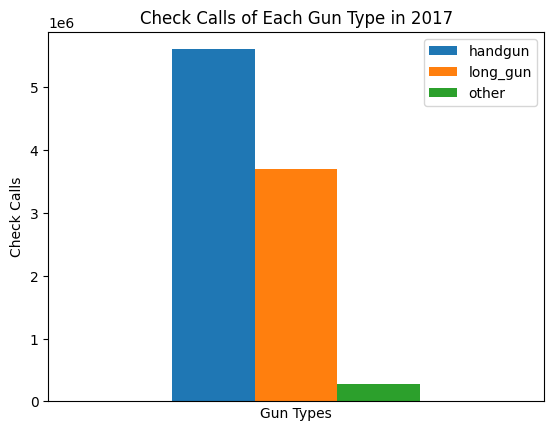

In [4749]:
# Perfecto! Now all we need is to plot this and draw a conclusion.
ax = focus_guntype_2017.plot(kind='bar', legend=True)
plt.xlabel("Gun Types")
plt.ylabel("Check Calls")
plt.title("Check Calls of Each Gun Type in 2017")
ax.set_xticks([])
plt.show()

#### => Based on the graph above, we can see that the number of inspection calls for **handguns** is the most outstanding.

In [4750]:
# Define a quick  way to get the total handgun of a particular year
def total_handgun(year: int = 0):
    if (year == 0):
        return 0
    #endif
    gun_of_year_x = df_gun[df_gun['year'] == int(year)]
    
    focus_guntype_x = gun_of_year_x.drop(['year', 'month', 'state', 'permit', 'permit_recheck', 'multiple', 'admin', 'totals'], axis=1)
    focus_guntype_x.iloc[0] = focus_guntype_x.sum()
    focus_guntype_x = focus_guntype_x.iloc[:1]
    
    long_gun_column = focus_guntype_x.filter(regex='_long_gun')
    focus_guntype_x.drop(columns=long_gun_column.columns, inplace=True)
    other_column = focus_guntype_x.filter(regex='_other')
    focus_guntype_x.drop(columns=other_column.columns, inplace=True)
    
    hand_gun_column = focus_guntype_x.filter(regex='_handgun')
    focus_guntype_x['handgun'] += hand_gun_column.sum(axis=1)
    focus_guntype_x.drop(columns=hand_gun_column.columns, inplace=True)
    
    return int(focus_guntype_x.iloc[0, 0])
#enddef

In [4751]:
# Test this func !
total_handgun(2015)

7755002

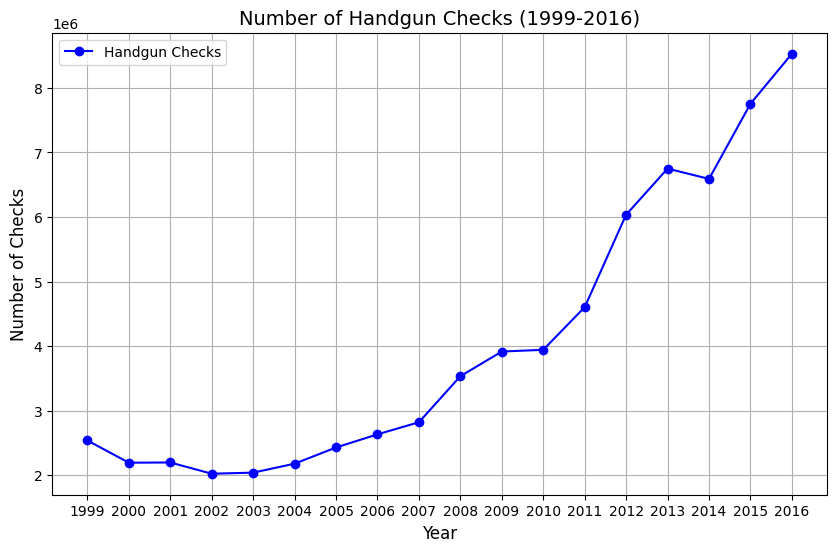

In [4752]:
# Plot data from 1999 to 2016

# Create data list
years = [int(x) for x in range(1999, 2017)]
handgun_checks = [total_handgun(year) for year in years]

# Set the size of the plot
plt.figure(figsize=(10, 6))  
plt.plot(years, handgun_checks, marker='o', linestyle='-', color='b', label='Handgun Checks')

# Add title and labels
plt.title('Number of Handgun Checks (1999-2016)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Checks', fontsize=12)

# Show grid and legend
plt.grid(True)
plt.legend()
plt.xticks(range(min(years), max(years) + 1))

# Display the plot
plt.show()

#### => Base on this graph, although a slight decrease during 1999-2002, we can clearly see an upward trend in the number of check on handgun purchase throughout the years between 2003 and 2016.
(The year 1998 and 2017 in the database only got data til September so it is excluded from the analysis)

<a id='q2'></a>
### Research Question 2: Is there a relation between population of U.S. states and the number of gun purchase checks in 2016?

In [4753]:
# Create a new table of population in each state in 2016. (We only need the 1st column)
df_census_2016 = pd.Series(df_census.iloc[:, 0]).to_frame()
df_census_2016 = df_census_2016.reset_index()
df_census_2016 = df_census_2016.rename(columns={'index': 'State'})
df_census_2016 = df_census_2016.rename(columns={0: 'Population'})
df_census_2016 = df_census_2016.iloc[1:]
df_census_2016

,State,Population
1,Alabama,"4,863,300"
2,Alaska,"741,894"
3,Arizona,"6,931,071"
4,Arkansas,"2,988,248"
5,California,"39,250,017"
6,Colorado,"5,540,545"
7,Connecticut,"3,576,452"
8,Delaware,"952,065"
9,Florida,"20,612,439"
10,Georgia,"10,310,371"


In [4754]:
# Function to remove commas and convert to integer
def remove_commas(value):
    return int(str(value).replace(',', ''))
# enddef

# Apply the function to all numeric columns
for col in df_census_2016.columns:
    df_census_2016.iloc[:, 1] = df_census_2016.iloc[:, 1].apply(remove_commas)
#endfor

df_census_2016.head(5)

,State,Population
1,Alabama,4863300
2,Alaska,741894
3,Arizona,6931071
4,Arkansas,2988248
5,California,39250017


In [4755]:
# Create a new dataframe that is focus on what we need.
df_focus_gun = df_gun[['year', 'month', 'state', 'totals']]
df_focus_gun.head(5)

,year,month,state,totals
0,2017,9,Alabama,32019
1,2017,9,Alaska,6303
2,2017,9,Arizona,28394
3,2017,9,Arkansas,17747
4,2017,9,California,123506


In [4756]:
# Create a func to calculate the total value of check call of a specific state of a specific year.
def state_total_check_of_year(year: int = 0, state: str = ''):
    if (year <= 0) or (str == ''):
        return -1
    #endif

    filtered_df = df_focus_gun[(df_focus_gun['state'] == state) & (df_focus_gun['year'] == year)]
    total_value = filtered_df['totals'].sum()
    return total_value
#enddef

# Test func
state_total_check_of_year(2016, 'California')

np.int64(2377167)

In [4757]:
# Create a list of states to iterate over
states = df_census_2016['State'].unique()

# Create a list to store the results
results = []

# Iterate over each state and calculate the total value
for state in states:
    total_value = state_total_check_of_year(2016, state)
    results.append([state, total_value])
#endfor

# Create a new DataFrame from the results
df_total_each_state_2016 = pd.DataFrame(results, columns=['State', 'Total'])
df_total_each_state_2016

,State,Total
0,Alabama,616947
1,Alaska,87647
2,Arizona,416279
3,Arkansas,266014
4,California,2377167
5,Colorado,540514
6,Connecticut,317692
7,Delaware,59430
8,Florida,1435340
9,Georgia,612985


In [4758]:
# Merge to calculate more ezly
df_check_and_population_2016 = df_census_2016.merge(df_total_each_state_2016, on='State')
df_check_and_population_2016.rename(columns={'Population': 'Population 2016'}, inplace=True)
df_check_and_population_2016.rename(columns={'Total': 'Total Checks 2016'}, inplace=True)
df_check_and_population_2016

,State,Population 2016,Total Checks 2016
0,Alabama,4863300,616947
1,Alaska,741894,87647
2,Arizona,6931071,416279
3,Arkansas,2988248,266014
4,California,39250017,2377167
5,Colorado,5540545,540514
6,Connecticut,3576452,317692
7,Delaware,952065,59430
8,Florida,20612439,1435340
9,Georgia,10310371,612985


In [4759]:
df_check_and_population_2016['% of Total Check over Population'] = (df_check_and_population_2016['Total Checks 2016'] / df_check_and_population_2016['Population 2016']) * 100
df_check_and_population_2016

,State,Population 2016,Total Checks 2016,% of Total Check over Population
0,Alabama,4863300,616947,12.685769
1,Alaska,741894,87647,11.813952
2,Arizona,6931071,416279,6.005984
3,Arkansas,2988248,266014,8.902005
4,California,39250017,2377167,6.056474
5,Colorado,5540545,540514,9.755611
6,Connecticut,3576452,317692,8.882882
7,Delaware,952065,59430,6.242221
8,Florida,20612439,1435340,6.963465
9,Georgia,10310371,612985,5.945324


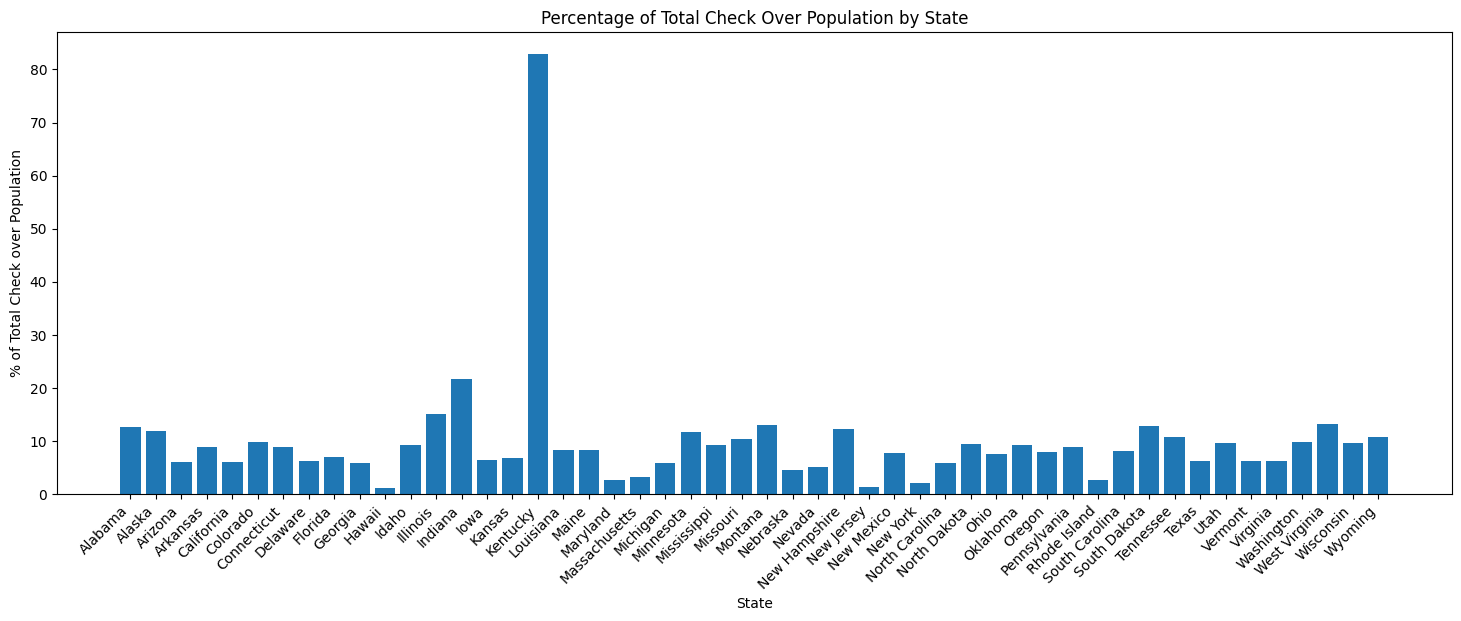

In [4760]:
# Set the figure size
plt.figure(figsize=(18, 6))

# Plot the bar chart
plt.bar(df_check_and_population_2016['State'], df_check_and_population_2016['% of Total Check over Population'])

# Set the x-axis label
plt.xlabel('State')
plt.xticks(rotation=45, ha='right')

# Set the y-axis label
plt.ylabel('% of Total Check over Population')

# Set the title
plt.title('Percentage of Total Check Over Population by State')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [4761]:
# Min
min_value = df_check_and_population_2016['% of Total Check over Population'].min()
print('Min: ', min_value)

# Max
max_value = df_check_and_population_2016['% of Total Check over Population'].max()
print('Max: ', max_value)

# Avr
mean_value = df_check_and_population_2016['% of Total Check over Population'].mean()
print('Avr: ', mean_value)

Min:  1.1676817935861152
Max:  82.86834676065264
Avr:  9.769509442966875


#### => This shows that except **Kentucky (~83%)** and **Hawaii (~1.2%)** being the outliner , the **average percentage of guncheck over population** is around **10% (~9.77%)** in 2016.
But overall, there is no clear common percentive of check over population across all state.

<a id='q3'></a>
### Research Question 3: What census data is most associated with high background check?

In [4762]:
# We only care about Tatal check for each state.
df_total_by_state = df_gun[['state', 'totals']]
df_total_by_state = df_total_by_state.rename(columns={'state': 'State'})
df_total_by_state = df_total_by_state.rename(columns={'totals': 'Total Checks'})
# Group the DataFrame by 'State' and calculate the sum of 'Total'
df_total_by_state = df_total_by_state.groupby('State')['Total Checks'].sum().reset_index()
df_total_by_state

,State,Total Checks
0,Alabama,6706079
1,Alaska,1137643
2,Arizona,4425714
3,Arkansas,3752633
4,California,19014063
5,Colorado,6058482
6,Connecticut,3168126
7,Delaware,491369
8,District of Columbia,5601
9,Florida,11695777


In [4763]:
df_census_t = df_census.T
df_census_t

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,"Nonminority-owned firms, 2012","272,651","51,147","344,981","189,029","1,819,107","442,365","259,614","54,782","1,121,749",...,74228,434025,"1,224,845","218,826","70,491","450,109","426,697","104,785","379,934","55,397"
60,"Veteran-owned firms, 2012","41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206","185,756",...,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
61,"Nonveteran-owned firms, 2012","316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318","1,846,686",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
62,"Population per square mile, 2010",94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,350.6,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8


In [4764]:
dict_census_vars = {}
for i in range(64): 
    dict_census_vars[i] = df_census_t['Fact'][i]
    print(i, df_census_t['Fact'][i])
#endfor

0 Population estimates, July 1, 2016,  (V2016)
1 Population estimates base, April 1, 2010,  (V2016)
2 Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)
3 Population, Census, April 1, 2010
4 Persons under 5 years, percent, July 1, 2016,  (V2016)
5 Persons under 5 years, percent, April 1, 2010
6 Persons under 18 years, percent, July 1, 2016,  (V2016)
7 Persons under 18 years, percent, April 1, 2010
8 Persons 65 years and over, percent,  July 1, 2016,  (V2016)
9 Persons 65 years and over, percent, April 1, 2010
10 Female persons, percent,  July 1, 2016,  (V2016)
11 Female persons, percent, April 1, 2010
12 White alone, percent, July 1, 2016,  (V2016)
13 Black or African American alone, percent, July 1, 2016,  (V2016)
14 American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)
15 Asian alone, percent, July 1, 2016,  (V2016)
16 Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)
17 Two or More Races, percent, 

In [4765]:
# There are some 'State' value that doesnt match the 'State' census, we need to filer it out.
list_of_state_to_remove = []

for state in df_total_by_state['State']:
    if state not in df_census.index:
        list_of_state_to_remove.append(state)
        print(state)
    #endif
#endfor

District of Columbia
Guam
Mariana Islands
Puerto Rico
Virgin Islands


In [4766]:
# Removing these unmatched states.
df_total_by_state = df_total_by_state[~df_total_by_state['State'].isin(list_of_state_to_remove)]
df_total_by_state.shape

(50, 2)

In [4767]:
df_total_by_state.reset_index(inplace=True)
df_total_by_state = df_total_by_state.drop('index', axis=1)
df_total_by_state

,State,Total Checks
0,Alabama,6706079
1,Alaska,1137643
2,Arizona,4425714
3,Arkansas,3752633
4,California,19014063
5,Colorado,6058482
6,Connecticut,3168126
7,Delaware,491369
8,Florida,11695777
9,Georgia,7209942


In [4768]:
# Define a few helper func to calculate correlation

def parse_str_percent(string_percent):
    return float(string_percent.strip('%')) / 100
#enddef

def correlation(x, y):
    # print("This is X: ", x)
    # print("This is Y: ", y)
    x_std = x.std(ddof=0)
    y_std = y.std(ddof=0)
    x_mean = x.mean()
    y_mean = y.mean()
    correlation = (((x - x_mean) / x_std) * ((y - y_mean) / y_std)).mean()
    return correlation
#enddef

def get_correlation(index: int = 0):
    series_x = df_census_t.iloc[index][1:]
    temp_list = []

    for i in range(len(series_x)):
        series_x[i] = str(series_x[i])
        # print("From: ", i, series_x[i])
        if (series_x[i][0] == '$'):
            series_x[i] = int(((series_x[i].replace('$','')).replace(' ', '')).replace(',', ''))
        elif (series_x[i][-1] == '%'):
            series_x[i] = parse_str_percent(series_x[i])
        elif (series_x[i][-1] != '%'):
            try:
                series_x[i] = int(series_x[i].replace(',',''))
            except ValueError:
                try:
                    series_x[i] = float(series_x[i].replace(',',''))
                except ValueError:
                    series_x[i] = np.nan
                #endtrycatch
            #endtrycatch
        #endif
        # print("To: ", i, series_x[i])
        temp_list.append(series_x[i])
    #endfor

    for i in range(len(series_x)):
        if (temp_list[i] == np.nan):
            temp_list[i] = series_x.mean()
        #endif
    #endfor

    series_x = pd.Series(temp_list)

    return correlation(df_total_by_state['Total Checks'], series_x)
#enddef

In [4769]:
# Instantiate a correlation coefficients dict
corrcoefs = {}
# Iterating all 64 numerical column
for i in range(64): 
    corrcoef = get_correlation(i)
    corrcoefs[i] = corrcoef
    # printing the column index, corrcoef and the variable name
    print(i, "\t", round(corrcoef, 10), "\t", dict_census_vars[i])
#endfor

0 	 0.6496966331 	 Population estimates, July 1, 2016,  (V2016)
1 	 0.6495825003 	 Population estimates base, April 1, 2010,  (V2016)
2 	 0.0363316769 	 Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)
3 	 0.6495802324 	 Population, Census, April 1, 2010
4 	 0.0560135355 	 Persons under 5 years, percent, July 1, 2016,  (V2016)
5 	 0.064057574 	 Persons under 5 years, percent, April 1, 2010
6 	 0.1097967436 	 Persons under 18 years, percent, July 1, 2016,  (V2016)
7 	 0.1361577977 	 Persons under 18 years, percent, April 1, 2010
8 	 -0.1694441685 	 Persons 65 years and over, percent,  July 1, 2016,  (V2016)
9 	 -0.1358959787 	 Persons 65 years and over, percent, April 1, 2010
10 	 0.1691615107 	 Female persons, percent,  July 1, 2016,  (V2016)
11 	 0.1531019657 	 Female persons, percent, April 1, 2010
12 	 0.011658108 	 White alone, percent, July 1, 2016,  (V2016)
13 	 0.1443264708 	 Black or African American alone, percent, July 1, 2016,  (V2016)
14

In [4770]:
# Now that we has the coorelation, we need to figgure out what is the most positive.
# Sort the correlation dictionary 
sorted_corrcoefs = sorted(corrcoefs, key=corrcoefs.get, reverse=True)

# Print the Sorted List
for each in sorted_corrcoefs:
    print(str(each) + ',', end='', flush=True)
#endfor

42,20,30,22,23,60,0,1,3,59,44,51,43,50,54,55,56,61,41,57,52,29,40,58,49,53,46,18,33,21,10,31,11,36,13,7,6,37,63,5,4,2,32,12,15,28,62,26,24,9,19,25,16,17,35,8,27,48,47,14,38,45,39,34,

In [4771]:
# So now we know that the most related field index is (42), let's see what it is in name:
print(sorted_corrcoefs[0], "\t", str(round(corrcoefs[sorted_corrcoefs[0]], 10)), "\t", dict_census_vars[sorted_corrcoefs[0]])

42 	 0.6883571912 	 Total manufacturers shipments, 2012 ($1,000)


In [4772]:
# Time to visualize !!
# We will now create a table merging total checks and total manufacturers shipments
field_42_value_list = []

for i in range(1, len(df_census_t.iloc[42])):
    field_42_value_list.append(df_census_t.iloc[42][i])
    # print(df_census_t.iloc[42][i])
#endfor

field_42_value_list = [0 if np.isnan(x) else x for x in field_42_value_list]

df_coorelation_show = df_total_by_state.copy()

df_coorelation_show['Total manufacturers shipments'] = field_42_value_list
df_coorelation_show

,State,Total Checks,Total manufacturers shipments
0,Alabama,6706079,124809759
1,Alaska,1137643,0
2,Arizona,4425714,51243473
3,Arkansas,3752633,62712925
4,California,19014063,512303164
5,Colorado,6058482,50447098
6,Connecticut,3168126,55160095
7,Delaware,491369,22597384
8,Florida,11695777,96924106
9,Georgia,7209942,155836792


Text(0, 0.5, 'Total # of Background Checks upon Gun Puchase')

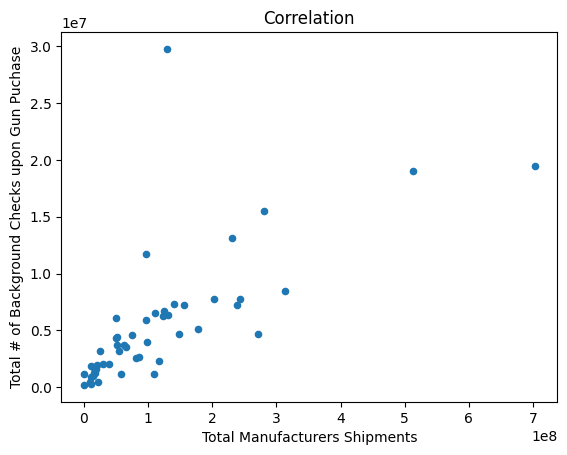

In [4773]:
ax = df_coorelation_show.plot.scatter(x='Total manufacturers shipments', y='Total Checks')
ax.set_title('Correlation')
ax.set_xlabel('Total Manufacturers Shipments')
ax.set_ylabel('Total # of Background Checks upon Gun Puchase')

Text(0, 0.5, 'Total # of Background Checks upon Gun Puchase')

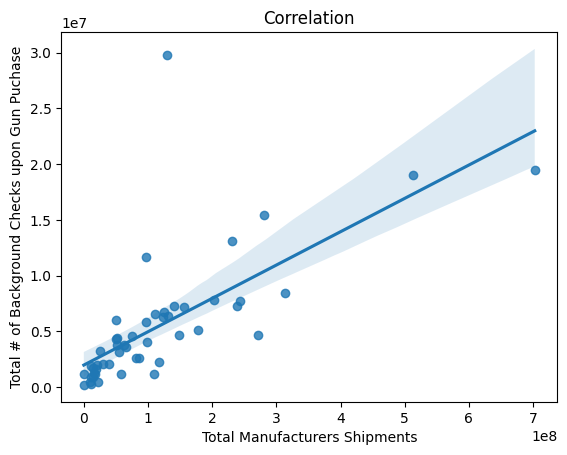

In [4774]:
# Let's visualize it again by seaborn.
ax = sns.regplot(data=df_coorelation_show, x='Total manufacturers shipments', y='Total Checks')
ax.set_title('Correlation')
ax.set_xlabel('Total Manufacturers Shipments')
ax.set_ylabel('Total # of Background Checks upon Gun Puchase')

#### => This show that the 'Total Manufacturers Shipments' is related to the 'Total # of Checks' !!

<a id='conclusions'></a>
## Conclusions
1. What is the most purchased type of gun in 2017? Trend of this type (plot from 1999-2016)?<br>
 -> The type of guns that the population in the United States purchased the most in 2017 are primarily **handguns**; second is the *long_guns* and *other* types of firearms.<br>
 -> Although a slight decrease during 1999-2002, we can clearly see an **upward trend** in the number of check on **handgun** purchase throughout the years between 2003 and 2016.<br>
2. Is there a relation between population of U.S. states and the number of gun purchase checks in 2016?<br>
 -> Population estimate and total gun sales are close in Kentucky in 2016, while they are not even close in other states.<br>
 -> Overall, there is no clear trend percentage of purchage checks and population.<br>
3. What census data is most associated with high background check?<br>
 -> The most associated census data with gun data is '**Total Manufacturers Shipments**' with a Pearson's Correlation Coefficient **0.6883571912**.<br>


<a id='limitation'></a>
## Limitation
In FBI Gun Data: 1998 and 2017 misses informations in 10 months. Census data are restricted on population in 2010 and 2016.
The dataset of census has a few inconsistant data, which are letters instead of numeric-like data and have some special meanings.

In [4775]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 785174 bytes to Investigate_a_Dataset.html
